# Load Packages 

In [157]:
#Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [158]:
dataset = pd.read_csv(r"C://dataset_weight//weight-height.csv")
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [89]:
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [96]:
dataset = dataset.reindex(['Gender','Height','Weight'], axis=1)
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [97]:
dataset.shape

(10000, 3)

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [99]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# Cleaning the data

In [159]:
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [160]:
dataset.duplicated().sum()

0

# Convert Gender to number

In [161]:
dataset['Gender'].replace('Female',0,inplace=True)
dataset['Gender'].replace('male',1,inplace=False)
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [162]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

# Data Analysis

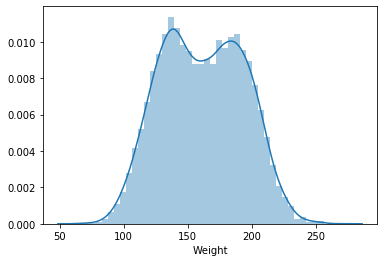

In [163]:
sns.distplot(dataset['Weight'])

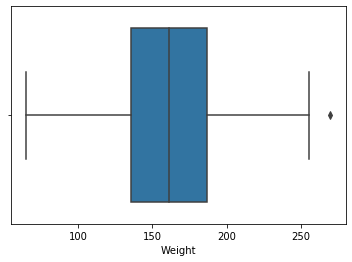

In [164]:
sns.boxplot(dataset['Weight'])

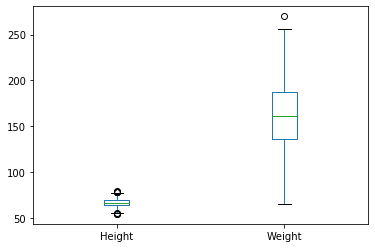

In [165]:
dataset.plot(kind='box')
plt.show()

In [166]:
dataset.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


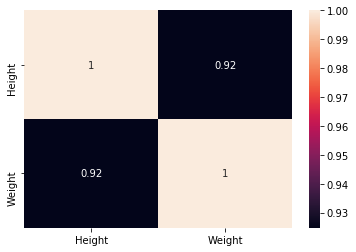

In [167]:
sns.heatmap(dataset.corr(),annot=True)

In [199]:
x = np.array(dataset['Height']).reshape(-1 , 1)
y = np.array(dataset['Weight']).reshape(-1 , 1)

In [216]:
x.shape , y.shape

((10000, 1), (10000,))

In [217]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

# Training Model

In [218]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Fit Regression Model

In [221]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
y_pred=LR.predict(X_test)
y_pred

array([148.7894772 , 168.43520123, 224.31884497, ..., 159.17576427,
       155.86404539, 144.83449257])

In [223]:
dataframe=pd.DataFrame({'actual value':y_test,'predicted value':y_pred})
dataframe

,actual value,predicted value
0,138.085796,148.789477
1,187.363366,168.435201
2,216.533191,224.318845
3,131.761443,157.702560
4,157.718438,149.733294
...,...,...
1995,189.856786,182.410166
1996,202.906859,203.809260
1997,152.420031,159.175764
1998,170.100647,155.864045


In [224]:
print('Accuracy of LR is: ', metrics.r2_score(y_test, y_pred))

Accuracy of LR is:  0.8581952493935258


In [225]:
#lra = coss_val_score(estimator = LR, x=X_train, y = y_train, cv=10)
#lra.mean()

In [226]:
print('mean square error of LR: ',metrics.mean_squared_error(y_test,y_pred))

mean square error of LR:  146.53677213957423


In [227]:
print('Mean Absolute Error of LR: ',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error of LR:  9.662897842061215


In [228]:
#input_data=(73.847017)


In [229]:
my_weight_pred = ([[70.8]])


In [230]:
my_weight_pred

[[70.8]]

In [215]:
import pickle 
pickle_out = open("logistics_reg","wb")
pickle.dump(LR,pickle_out)
pickle_out.close()